## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

#### Zoe Gates, gzp2eu ####

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = "1" #Necessary package for the environment, was getting error message and this helped

In [5]:
import numpy as np #Importing packages
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

In [6]:
#Creating the dataframes
df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

In [7]:
#Importing necessary packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'x2')

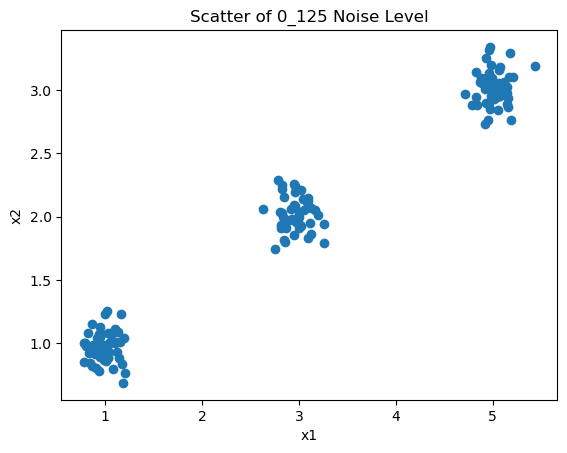

In [8]:
plt.scatter(df0_125['x1'], df0_125['x2'])  #Creating scatterplot for dataframe with least amount of noise
plt.title("Scatter of 0_125 Noise Level")
plt.xlabel('x1')
plt.ylabel('x2')

Text(0, 0.5, 'x2')

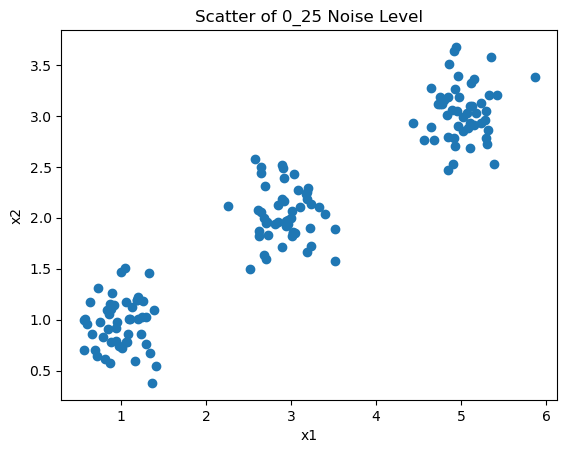

In [9]:
plt.scatter(df0_25['x1'], df0_25['x2']) #"" for 0.25 level of noise df
plt.title("Scatter of 0_25 Noise Level")
plt.xlabel('x1')
plt.ylabel('x2')

Text(0.5, 1.0, 'Scatter of 0_5 Noise Level')

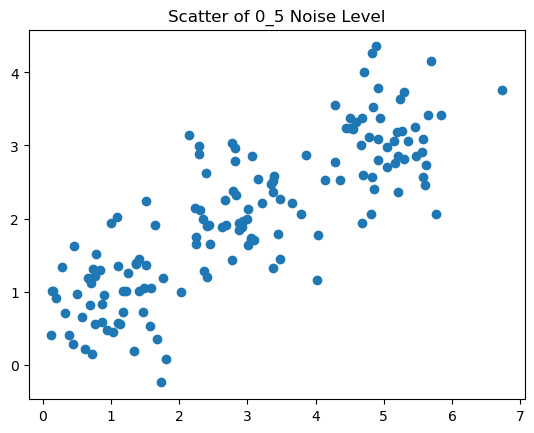

In [10]:
plt.scatter(df0_5['x1'], df0_5['x2'])
plt.title("Scatter of 0_5 Noise Level")

Text(0.5, 1.0, 'Scatter of 1_0 Noise Level')

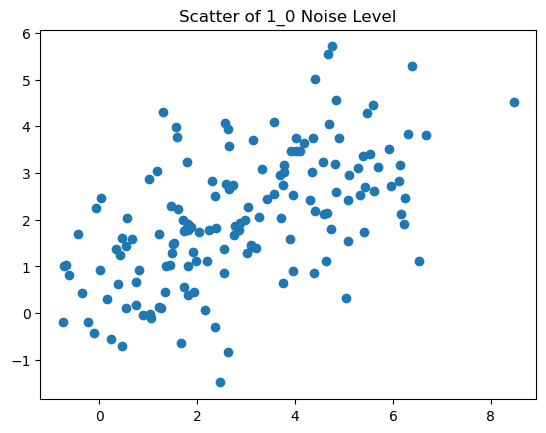

In [11]:
plt.scatter(df1_0['x1'], df1_0['x2'])
plt.title("Scatter of 1_0 Noise Level")

Text(0, 0.5, 'x2')

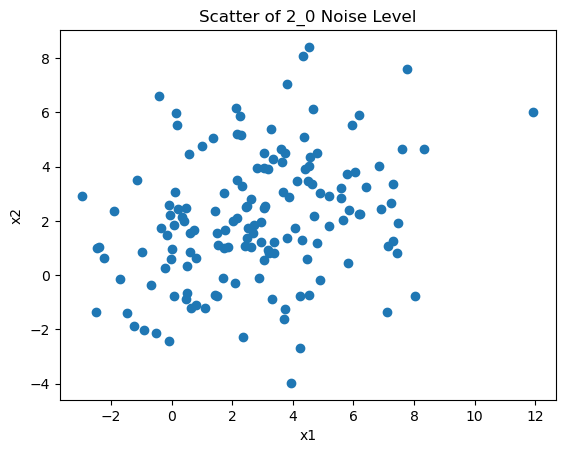

In [12]:
plt.scatter(df2_0['x1'], df2_0['x2']) #PLotting scatterplot for dataframe with the greatest amount of noise
plt.title("Scatter of 2_0 Noise Level")
plt.xlabel('x1')
plt.ylabel('x2')

#### What these Scatterplots Show: ####
These scatterplots show that as the noise increases, the cluster definition decreases. It becomes harder to tell one cluster apart from another.

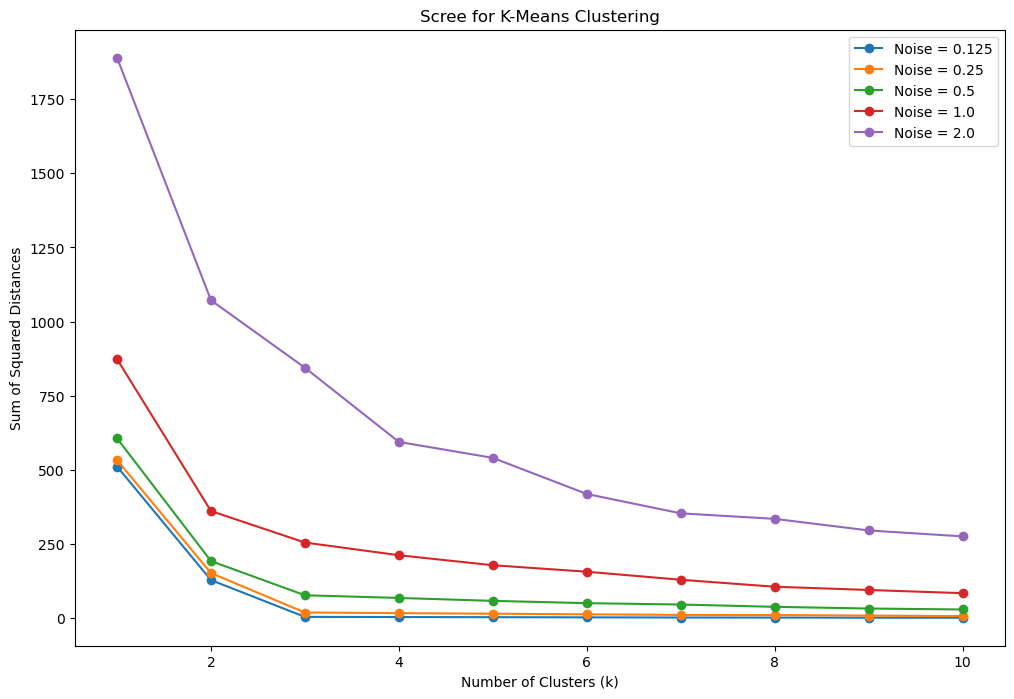

In [14]:
#Importing necessary tool from scikit for Kmeans clustering
from sklearn.cluster import KMeans


datasets = [df0_125, df0_25, df0_5, df1_0, df2_0] #Creating a list of datasets
noise_levels = [0.125, 0.25, 0.5, 1.0, 2.0] #Create a list so we can use for legend

# Creating the Scree 

plt.figure(figsize=(12, 8))

for i, df in enumerate(datasets): #Looping over different datasets with different noise levels
    X = df[['x1', 'x2']].values #Features used for our clustering
    inertia = []  #List to store inertia (sum of squared distances)
    k_range = range(1, 11) #Testing 10 k-values 
    for k in k_range:  # KMeans clustering for different k values
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    
    plt.plot(k_range, inertia, marker='o', label=f"Noise = {noise_levels[i]}")
    
plt.title('Scree for K-Means Clustering') #Adding title
plt.xlabel('Number of Clusters (k)') #Adding x label
plt.ylabel('Sum of Squared Distances') #Adding y label
plt.legend()
plt.show()

### Analysis ###

The elbow is the point on the plot where the number of clusters stop significantly increasing the variance explained. Increasing the number of clusters from that value on does not really add to the accuracy of prediction. The point at which the number of clusters stops decreasing the sum of squares distances is where an elbow forms. This is meaningful to explain how many clusters are needed to optimally explain the data. More clusters may be needed to discern points that are highly blended together as we see in the scatterplot. This means a higher k-value, but only to the point where it is significantly reducing the SSDs.

We can see that as noise increases, the SSD increases and more clusters are needed to get to this elbow point (shifts right). The noisier the data, the less homogenous the clusters are. More of them are needed to incorporate all of the points and minimize the distances between them and their respective cluster centroids.

The optimal k-value of graphs with higher noise is larger. They are going to need more clusters to minimize SSD and more accurately predict points!

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [20]:
election= pd.read_csv("https://raw.githubusercontent.com/gatesz33/clustering/refs/heads/main/assignment/data/2022%20election%20cycle%20fundraising.csv") #Loading in the data
election.head() #Checking that this worked

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [21]:
print(election.dtypes) #Checking data types of all of the column

index            int64
Member          object
Party           object
State           object
Chamber         object
Raised          object
Spent           object
Cash on Hand    object
Debts           object
dtype: object


In [22]:
print(election[['Raised', 'Spent', 'Cash on Hand', 'Debts']].isnull().sum()) #Checking for nulls in our numeric column

Raised          0
Spent           0
Cash on Hand    0
Debts           0
dtype: int64


In [38]:
election[['Raised', 'Spent', 'Cash on Hand', 'Debts']] = election[['Raised', 'Spent', 'Cash on Hand', 'Debts']].replace({r'\$': '', ',': ''}, regex=True) #We are getting rid of the '$' and commas with .replace() in order to cast to numeric and perform clustering
election[['Raised', 'Spent', 'Cash on Hand', 'Debts']] = election[['Raised', 'Spent', 'Cash on Hand', 'Debts']].apply(pd.to_numeric, errors='coerce') #Converting to numeric
election.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396,7449678,851851,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741,1243502,2472888,0
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0
3,3,Adam Smith,Democratic,Washington,House,1211111,1173466,623472,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611,1664674,1098579,0


In [40]:
print(election.dtypes) #Checking the data types now to make sure this was successful

index            int64
Member          object
Party           object
State           object
Chamber         object
Raised           int64
Spent            int64
Cash on Hand     int64
Debts            int64
dtype: object


In [42]:
# Preforming Max-Min Normalization since our numbers are so large. This is preparation for clustering

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return z

vars =  ['Raised','Spent','Cash on Hand','Debts']

X = election.loc[:,vars]
X = X.apply(maxmin)

X.describe()

,Raised,Spent,Cash on Hand,Debts
count,537.000000,537.000000,537.000000,537.000000
mean,0.056596,0.037852,0.081267,0.009537
std,0.083859,0.083362,0.122833,0.063347
min,0.000000,0.000000,0.000000,0.000000
25%,0.026710,0.009643,0.021011,0.000000
50%,0.035440,0.016321,0.044858,0.000000
75%,0.053961,0.032991,0.087146,0.000000
max,1.000000,1.000000,1.000000,1.000000


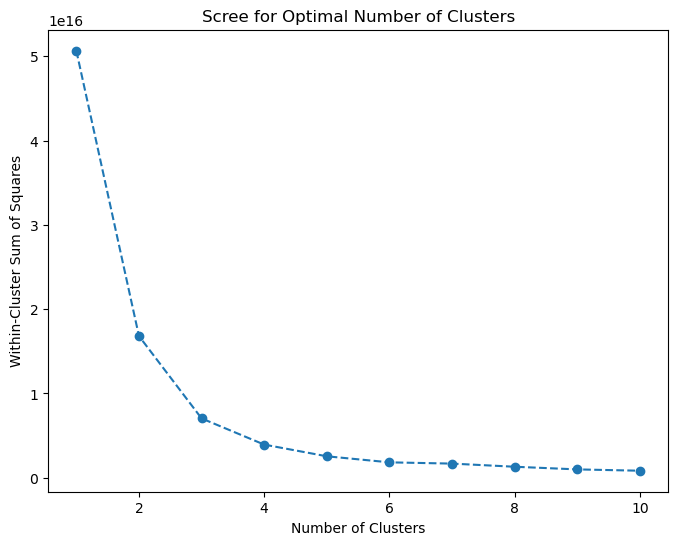

In [44]:
inertia = []  # Store inertia values (within-cluster sum of squares)
for k in range(1, 11):  # Iterating over 10 different k values
    kmeans = KMeans(n_clusters=k, random_state=65) 
    kmeans.fit(election[['Raised', 'Spent']]) #Fitting on these two features
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--') #Creating the scree plot for optimal number of clusters
plt.title('Scree for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

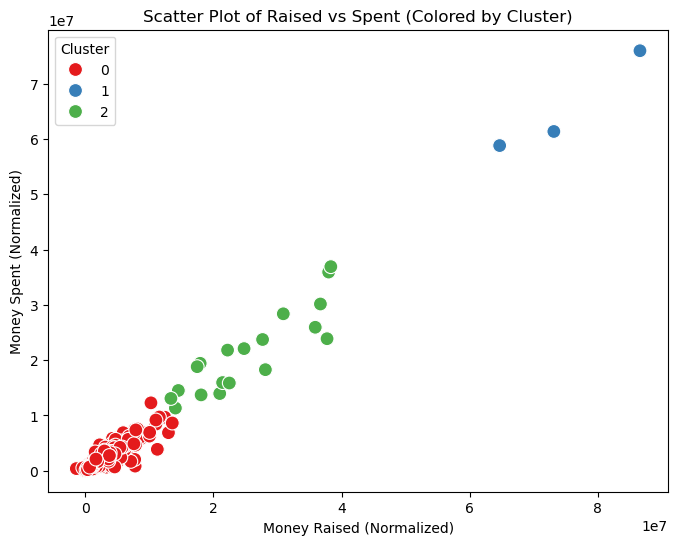

In [46]:
kmeans = KMeans(n_clusters=3, random_state=65) #defining kmeans and the number of clusters
election['Cluster'] = kmeans.fit_predict(election[['Raised', 'Spent']]) #Fitting the data on the model

plt.figure(figsize=(8, 6))
sns.scatterplot(data=election, x='Raised', y='Spent', hue='Cluster', palette='Set1', s=100) #Creating the scatterplot
plt.title('Scatter Plot of Raised vs Spent (Colored by Cluster)')
plt.xlabel('Money Raised (Normalized)')
plt.ylabel('Money Spent (Normalized)')
plt.legend(title='Cluster')
plt.show()

In [48]:
cluster_sizes = election['Cluster'].value_counts() #Checking the cluster size to see how many points well into each 
print("Cluster sizes:\n", cluster_sizes)

Cluster sizes:
 Cluster
0    515
2     19
1      3
Name: count, dtype: int64


In [50]:
smallest_clusters = cluster_sizes.nsmallest(2)  # Getting the two smallest clusters

In [52]:
smallest_cluster_index = smallest_clusters.index  #Getting the cluster labels
smallest_cluster_facts = election[election['Cluster'].isin(smallest_cluster_index)] #Getting the information from the smallest clusters and what points are in them

print("Smallest clusters:")
print(smallest_cluster_facts[['Member', 'Party','State', 'Chamber', 'Raised', 'Spent', 'Cluster']])


Smallest clusters:
                     Member        Party           State Chamber    Raised  \
2               Adam Schiff   Democratic      California   House  20993041   
45           Bernie Sanders  Independent         Vermont  Senate  14074831   
87   Catherine Cortez Masto   Democratic          Nevada  Senate  37993811   
89            Chuck Schumer   Democratic        New York  Senate  35899966   
115            Dan Crenshaw   Republican           Texas   House  14535870   
261            John Kennedy   Republican       Louisiana  Senate  28119082   
290            Katie Porter   Democratic      California   House  21441693   
298          Kevin McCarthy   Republican      California   House  24791538   
326           Maggie Hassan   Democratic   New Hampshire  Senate  30914830   
328             Marco Rubio   Republican         Florida  Senate  36709285   
340              Mark Kelly   Democratic         Arizona  Senate  73140886   
357          Michael Bennet   Democratic     

We can see that the smallest clusters are those that have the greatest money both raised and spent. California is the state dominating this data. After looking up these races, I found there to be varying degrees of margin between candidates. Most of these races were close, and then the ones that were safe involved very high profile candidates like John McCarthy. This comes to show that candidates raised and spent more on their campaign if the election was expected to be closer.

https://www.opensecrets.org/news/2023/01/rep-katie-porter-raised-more-money-than-other-house-democrats-during-2022-election-without-contributions-from-corporate-pac-or-lobbyists/

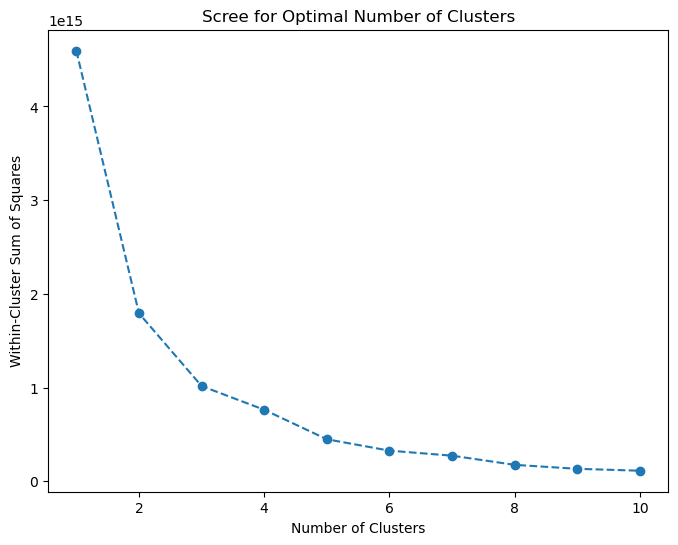

In [55]:
inertia = []  # Store inertia values (within-cluster sum of squares)
for k in range(1, 11):  # Trying from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=65)
    kmeans.fit(election[['Cash on Hand', 'Debts']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Scree for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

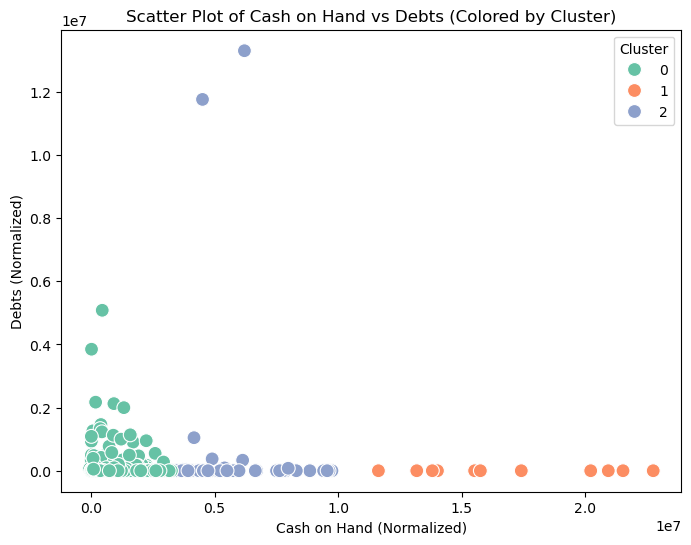

In [57]:
kmeans = KMeans(n_clusters=3, random_state=65)
election['Cluster'] = kmeans.fit_predict(election[['Cash on Hand', 'Debts']]) #Running kmeans with 'Cash on Hand' and 'Debts' as fitting variables

plt.figure(figsize=(8, 6))
sns.scatterplot(data=election, x='Cash on Hand', y='Debts', hue='Cluster', palette='Set2', s=100)
plt.title('Scatter Plot of Cash on Hand vs Debts (Colored by Cluster)')
plt.xlabel('Cash on Hand (Normalized)')
plt.ylabel('Debts (Normalized)')
plt.legend(title='Cluster')
plt.show()

In [59]:
cluster_sizes = election['Cluster'].value_counts() #Checking the cluster size to see how many points fall into each
print("Cluster sizes:\n", cluster_sizes)

Cluster sizes:
 Cluster
0    474
2     52
1     11
Name: count, dtype: int64


In [61]:
smallest_clusters = cluster_sizes.nsmallest(2) #Getting the two smallest clusters again
smallest_cluster_index = smallest_clusters.index  #Getting the cluster labels
smallest_cluster_facts = election[election['Cluster'].isin(smallest_cluster_index)] #Getting the information from the smallest clusters and what points are in them

print("Smallest clusters:")
print(smallest_cluster_facts[['Member', 'Party','State', 'Chamber', 'Raised', 'Spent', 'Cluster']])

Smallest clusters:
                       Member        Party           State Chamber    Raised  \
2                 Adam Schiff   Democratic      California   House  20993041   
11               Alex Padilla   Democratic      California  Senate  11253771   
12   Alexandria Ocasio-Cortez   Democratic        New York   House  11326505   
45             Bernie Sanders  Independent         Vermont  Senate  14074831   
49                Bill Foster   Democratic        Illinois   House   3289974   
..                        ...          ...             ...     ...       ...   
498                 Tim Kaine   Democratic        Virginia  Senate   2239085   
500                 Tim Scott   Republican  South Carolina  Senate  37743256   
503                Todd Young   Republican         Indiana  Senate  10055406   
506                Tom Cotton   Republican        Arkansas  Senate   4637570   
523               Val Demings   Democratic         Florida   House  64682883   

        Spent  Clust

We see that the points in these smaller clusters are very similar to the points in our previous KMeans scatterplot. The previous scatterplot showed top campaigns for raising and spending money. The smallest clusters for Debts and Cash on Hand were those that had a lot of cash on hand and little to no debt. This makes sense, for it means that the campaigns that did raise a lot of money raised enough to cover all of their debts and spend a lot on enhancing their public image. We also saw that these expensive campaigns often belonged to high profile candidates. Most politicians are not at this celebrity status and are not able to gain as much traction. As a result, they end up running themselves into debt trying to win races. This is why campaigning is risky, long, and tedious.

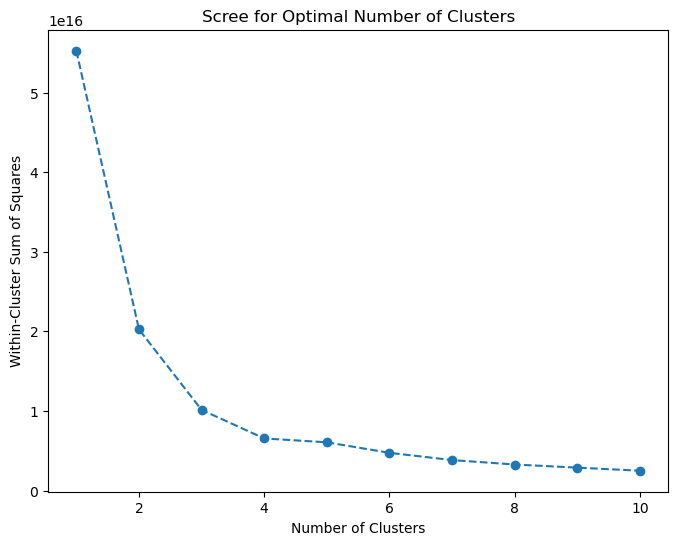

In [64]:
inertia = []  # Store inertia values (within-cluster sum of squares)
for k in range(1, 11):  # Trying from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=65)
    kmeans.fit(election[['Raised','Spent','Cash on Hand', 'Debts']]) #Fitting on all four variables
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Scree for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

We don't really see much of a difference in the scree plot, so we opt to have the same number of clusters.

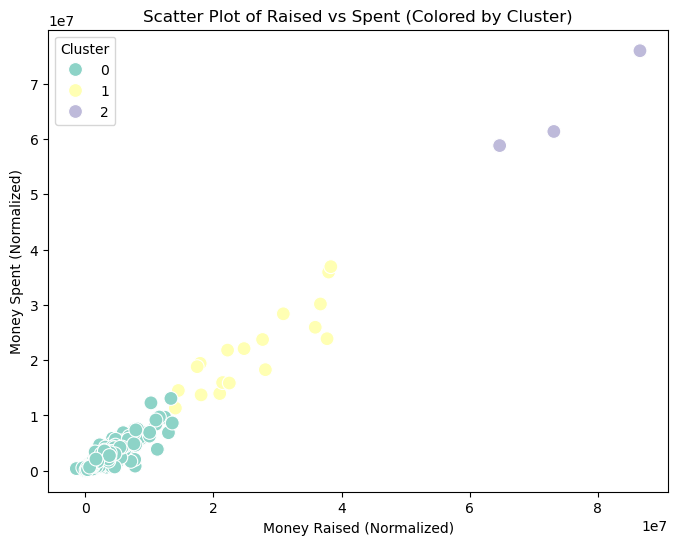

In [67]:

kmeans = KMeans(n_clusters=3, random_state=65)
election['Cluster'] = kmeans.fit_predict(election[['Raised','Spent','Cash on Hand', 'Debts']])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=election, x='Raised', y='Spent', hue='Cluster', palette='Set3', s=100) #Visualizing the scatter plot on the new k-clustered data (used all numeric columns to fit)
plt.title('Scatter Plot of Raised vs Spent (Colored by Cluster)')
plt.xlabel('Money Raised (Normalized)')
plt.ylabel('Money Spent (Normalized)')
plt.legend(title='Cluster')
plt.show()

In [69]:
cluster_sizes = election['Cluster'].value_counts() #Checking new cluster sizes
print("Cluster sizes:\n", cluster_sizes)

Cluster sizes:
 Cluster
0    516
1     18
2      3
Name: count, dtype: int64


When we fit our data on all four variables, we see that not much changed. Again, this lack of change in distribution makes sense. After examining the clustering of Debts vs Cash on Hand and Money Raised v Spent, we see that the two sets of variables are actually very related. As a result, the clusters are very similar, containing the same campaign data points. We see one point move from cluster 1 to cluster zero, but otherwise they stay the same. These clusters represent campaign finance variables, which are all interrelated. Now, I have three defined clusters which could be really helpful in predicting how much money was spent on a campaign, which states had highest spending, where races in 2022 were close, among other things! KMc was helpful in this regard.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?